In [ ]:
import nltk
nltk.download()

In [1]:
from datascience import *
import numpy as np
from collections import Counter 
from string import punctuation, digits
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS 
from sklearn.feature_extraction.text import CountVectorizer
!pip install --no-cache-dir textblob
from textblob import TextBlob
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import MDS
from nltk.corpus import stopwords

    100% |████████████████████████████████| 634kB 11.3MB/s ta 0:00:01


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise
from scipy import stats

In [3]:
stop_words = (list(ENGLISH_STOP_WORDS))

In [4]:
with open('Perrault.csv', 'r') as f:
    perrault = f.read()
perrault

'Title,Text\nThe Sleeping Beauty in the Wood,"\nOnce upon a time there lived a king and queen who were grieved, more \ngrieved than words can tell, because they had no \nchildren. They tried the waters of every country, made vows and \npilgrimages, and did everything that could be done, but without \nresult. At last, however, the queen found that her wishes were fulfilled, \nand in due course she gave birth to a daughter. \n\nA grand christening was held, and all the fairies that could be found \nin the realm (they numbered seven in all) were invited to \nbe godmothers to the little princess. This was done so that by means of \nthe gifts which each in turn would bestow upon her (in \naccordance with the fairy custom of those days) the princess might be \nendowed with every imaginable perfection. \n\nWhen the christening ceremony was over, all the company returned to the \nking\'s palace, where a great banquet was held in \nhonor of the fairies. Places were laid for them in magnificent 

In [5]:
len_raw_p = len(perrault)
len_raw_p

96209

In [6]:
perrault = perrault.replace("Title,Text", ""). strip()
perrault_raw = perrault
perrault

'The Sleeping Beauty in the Wood,"\nOnce upon a time there lived a king and queen who were grieved, more \ngrieved than words can tell, because they had no \nchildren. They tried the waters of every country, made vows and \npilgrimages, and did everything that could be done, but without \nresult. At last, however, the queen found that her wishes were fulfilled, \nand in due course she gave birth to a daughter. \n\nA grand christening was held, and all the fairies that could be found \nin the realm (they numbered seven in all) were invited to \nbe godmothers to the little princess. This was done so that by means of \nthe gifts which each in turn would bestow upon her (in \naccordance with the fairy custom of those days) the princess might be \nendowed with every imaginable perfection. \n\nWhen the christening ceremony was over, all the company returned to the \nking\'s palace, where a great banquet was held in \nhonor of the fairies. Places were laid for them in magnificent style, and \

In [7]:
perrault1 = perrault.lower()
perrault1 = ''.join([char for char in perrault1 if char not in punctuation + digits]) 
p_tokens = perrault1.split()
p_tokens

['the',
 'sleeping',
 'beauty',
 'in',
 'the',
 'wood',
 'once',
 'upon',
 'a',
 'time',
 'there',
 'lived',
 'a',
 'king',
 'and',
 'queen',
 'who',
 'were',
 'grieved',
 'more',
 'grieved',
 'than',
 'words',
 'can',
 'tell',
 'because',
 'they',
 'had',
 'no',
 'children',
 'they',
 'tried',
 'the',
 'waters',
 'of',
 'every',
 'country',
 'made',
 'vows',
 'and',
 'pilgrimages',
 'and',
 'did',
 'everything',
 'that',
 'could',
 'be',
 'done',
 'but',
 'without',
 'result',
 'at',
 'last',
 'however',
 'the',
 'queen',
 'found',
 'that',
 'her',
 'wishes',
 'were',
 'fulfilled',
 'and',
 'in',
 'due',
 'course',
 'she',
 'gave',
 'birth',
 'to',
 'a',
 'daughter',
 'a',
 'grand',
 'christening',
 'was',
 'held',
 'and',
 'all',
 'the',
 'fairies',
 'that',
 'could',
 'be',
 'found',
 'in',
 'the',
 'realm',
 'they',
 'numbered',
 'seven',
 'in',
 'all',
 'were',
 'invited',
 'to',
 'be',
 'godmothers',
 'to',
 'the',
 'little',
 'princess',
 'this',
 'was',
 'done',
 'so',
 'that',

In [8]:
p_tokens = [x for x in p_tokens if x not in stop_words]
p_tokens

['sleeping',
 'beauty',
 'wood',
 'time',
 'lived',
 'king',
 'queen',
 'grieved',
 'grieved',
 'words',
 'tell',
 'children',
 'tried',
 'waters',
 'country',
 'vows',
 'pilgrimages',
 'did',
 'result',
 'queen',
 'wishes',
 'fulfilled',
 'course',
 'gave',
 'birth',
 'daughter',
 'grand',
 'christening',
 'held',
 'fairies',
 'realm',
 'numbered',
 'seven',
 'invited',
 'godmothers',
 'little',
 'princess',
 'means',
 'gifts',
 'turn',
 'bestow',
 'accordance',
 'fairy',
 'custom',
 'days',
 'princess',
 'endowed',
 'imaginable',
 'perfection',
 'christening',
 'ceremony',
 'company',
 'returned',
 'kings',
 'palace',
 'great',
 'banquet',
 'held',
 'honor',
 'fairies',
 'places',
 'laid',
 'magnificent',
 'style',
 'placed',
 'solid',
 'gold',
 'casket',
 'containing',
 'spoon',
 'fork',
 'knife',
 'fine',
 'gold',
 'set',
 'diamonds',
 'rubies',
 'just',
 'sitting',
 'table',
 'aged',
 'fairy',
 'seen',
 'enter',
 'thought',
 'invite',
 'reason',
 'years',
 'quitted',
 'tower',
 'l

In [9]:
perrault = perrault.split("\n,\n")
perrault

['The Sleeping Beauty in the Wood,"\nOnce upon a time there lived a king and queen who were grieved, more \ngrieved than words can tell, because they had no \nchildren. They tried the waters of every country, made vows and \npilgrimages, and did everything that could be done, but without \nresult. At last, however, the queen found that her wishes were fulfilled, \nand in due course she gave birth to a daughter. \n\nA grand christening was held, and all the fairies that could be found \nin the realm (they numbered seven in all) were invited to \nbe godmothers to the little princess. This was done so that by means of \nthe gifts which each in turn would bestow upon her (in \naccordance with the fairy custom of those days) the princess might be \nendowed with every imaginable perfection. \n\nWhen the christening ceremony was over, all the company returned to the \nking\'s palace, where a great banquet was held in \nhonor of the fairies. Places were laid for them in magnificent style, and 

In [10]:
len(perrault)

8

In [11]:
with open('Grimm.csv', 'r') as e: 
    grimm = e.read()
grimm2 = grimm
grimm

'All-Kinds-of-Fur,"Once upon a time there was a king, who had a wife with golden hair, and she was so beautiful that her equal was not to be found anywhere on earth. It happened that she fell ill, and when she felt that she was about to die, she called the king to her and said, ""If you want to remarry after my death then do not take anyone who is not as beautiful as I am, and who does not have such golden hair as mine. That you must promise me."" After the king had promised her this, she closed her eyes and died. For a long time the king could not be comforted, and he did not consider taking a second wife. Finally his councilors said, ""There is no other way. The king must remarry, so that we will have a queen."" Then messengers were sent out far and wide to seek a bride, who in beauty was entirely the equal of the deceased queen. However, no such bride could be found in the whole world. And even if a bride this beautiful had been found, she would not have had such golden hair. Thus t

In [12]:
len_raw_g = len(grimm)
len_raw_g

76711

In [13]:
grimm = grimm.replace(",,,,,,,", "").strip()
grimm_raw = grimm
grimm

'All-Kinds-of-Fur,"Once upon a time there was a king, who had a wife with golden hair, and she was so beautiful that her equal was not to be found anywhere on earth. It happened that she fell ill, and when she felt that she was about to die, she called the king to her and said, ""If you want to remarry after my death then do not take anyone who is not as beautiful as I am, and who does not have such golden hair as mine. That you must promise me."" After the king had promised her this, she closed her eyes and died. For a long time the king could not be comforted, and he did not consider taking a second wife. Finally his councilors said, ""There is no other way. The king must remarry, so that we will have a queen."" Then messengers were sent out far and wide to seek a bride, who in beauty was entirely the equal of the deceased queen. However, no such bride could be found in the whole world. And even if a bride this beautiful had been found, she would not have had such golden hair. Thus t

In [14]:
grimm1 = ''.join([char for char in grimm if char not in punctuation + digits + '\n'])
grimm1 = grimm1.lower()
g_tokens = grimm1.split()
g_tokens

['allkindsoffuronce',
 'upon',
 'a',
 'time',
 'there',
 'was',
 'a',
 'king',
 'who',
 'had',
 'a',
 'wife',
 'with',
 'golden',
 'hair',
 'and',
 'she',
 'was',
 'so',
 'beautiful',
 'that',
 'her',
 'equal',
 'was',
 'not',
 'to',
 'be',
 'found',
 'anywhere',
 'on',
 'earth',
 'it',
 'happened',
 'that',
 'she',
 'fell',
 'ill',
 'and',
 'when',
 'she',
 'felt',
 'that',
 'she',
 'was',
 'about',
 'to',
 'die',
 'she',
 'called',
 'the',
 'king',
 'to',
 'her',
 'and',
 'said',
 'if',
 'you',
 'want',
 'to',
 'remarry',
 'after',
 'my',
 'death',
 'then',
 'do',
 'not',
 'take',
 'anyone',
 'who',
 'is',
 'not',
 'as',
 'beautiful',
 'as',
 'i',
 'am',
 'and',
 'who',
 'does',
 'not',
 'have',
 'such',
 'golden',
 'hair',
 'as',
 'mine',
 'that',
 'you',
 'must',
 'promise',
 'me',
 'after',
 'the',
 'king',
 'had',
 'promised',
 'her',
 'this',
 'she',
 'closed',
 'her',
 'eyes',
 'and',
 'died',
 'for',
 'a',
 'long',
 'time',
 'the',
 'king',
 'could',
 'not',
 'be',
 'comforted

In [15]:
g_tokens = [x for x in g_tokens if x not in stop_words]
g_tokens

['allkindsoffuronce',
 'time',
 'king',
 'wife',
 'golden',
 'hair',
 'beautiful',
 'equal',
 'earth',
 'happened',
 'fell',
 'ill',
 'felt',
 'die',
 'called',
 'king',
 'said',
 'want',
 'remarry',
 'death',
 'beautiful',
 'does',
 'golden',
 'hair',
 'promise',
 'king',
 'promised',
 'closed',
 'eyes',
 'died',
 'long',
 'time',
 'king',
 'comforted',
 'did',
 'consider',
 'taking',
 'second',
 'wife',
 'finally',
 'councilors',
 'said',
 'way',
 'king',
 'remarry',
 'queen',
 'messengers',
 'sent',
 'far',
 'wide',
 'seek',
 'bride',
 'beauty',
 'entirely',
 'equal',
 'deceased',
 'queen',
 'bride',
 'world',
 'bride',
 'beautiful',
 'golden',
 'hair',
 'messengers',
 'returned',
 'home',
 'success',
 'king',
 'daughter',
 'just',
 'beautiful',
 'deceased',
 'mother',
 'golden',
 'hair',
 'come',
 'age',
 'king',
 'looked',
 'day',
 'resembled',
 'deceased',
 'wife',
 'way',
 'suddenly',
 'felt',
 'great',
 'love',
 'said',
 'councilors',
 'marry',
 'daughter',
 'image',
 'deceased

In [16]:
grimm = grimm.split("\n,\n")
grimm

['All-Kinds-of-Fur,"Once upon a time there was a king, who had a wife with golden hair, and she was so beautiful that her equal was not to be found anywhere on earth. It happened that she fell ill, and when she felt that she was about to die, she called the king to her and said, ""If you want to remarry after my death then do not take anyone who is not as beautiful as I am, and who does not have such golden hair as mine. That you must promise me."" After the king had promised her this, she closed her eyes and died. For a long time the king could not be comforted, and he did not consider taking a second wife. Finally his councilors said, ""There is no other way. The king must remarry, so that we will have a queen."" Then messengers were sent out far and wide to seek a bride, who in beauty was entirely the equal of the deceased queen. However, no such bride could be found in the whole world. And even if a bride this beautiful had been found, she would not have had such golden hair. Thus 

In [17]:
len(grimm)

8

In [18]:
p_dict = Counter(p_tokens)
g_dict = Counter(g_tokens)

The number 35 was arbitrarily chosen for the number of most common words from each corpus. 

In [19]:
p_common_words = p_dict.most_common()
p_common_35 = p_common_words[:35]
p_common_35

[('little', 92),
 ('said', 82),
 ('king', 55),
 ('went', 51),
 ('children', 49),
 ('time', 45),
 ('good', 45),
 ('princess', 44),
 ('wife', 43),
 ('poor', 37),
 ('great', 35),
 ('ogre', 35),
 ('beautiful', 34),
 ('came', 34),
 ('mother', 34),
 ('queen', 32),
 ('did', 31),
 ('young', 29),
 ('cried', 28),
 ('day', 28),
 ('come', 27),
 ('prince', 27),
 ('cinderella', 27),
 ('blue', 26),
 ('cat', 26),
 ('bed', 25),
 ('kings', 24),
 ('way', 24),
 ('told', 24),
 ('beard', 24),
 ('long', 22),
 ('took', 22),
 ('having', 22),
 ('godmother', 22),
 ('thumb', 22)]

In [20]:
g_common_words = g_dict.most_common()
g_common_35 = g_common_words[:35]
g_common_35

[('said', 100),
 ('little', 59),
 ('came', 58),
 ('went', 56),
 ('king', 34),
 ('time', 33),
 ('took', 32),
 ('house', 31),
 ('beautiful', 30),
 ('did', 30),
 ('good', 30),
 ('cried', 29),
 ('red', 29),
 ('away', 28),
 ('cap', 28),
 ('way', 27),
 ('saw', 26),
 ('day', 25),
 ('maiden', 25),
 ('home', 24),
 ('thought', 24),
 ('great', 23),
 ('father', 23),
 ('old', 23),
 ('golden', 22),
 ('come', 22),
 ('girl', 22),
 ('grandmother', 21),
 ('cinderella', 20),
 ('thumbling', 20),
 ('fell', 19),
 ('just', 19),
 ('cook', 19),
 ('gave', 19),
 ('bed', 19)]

A horizontal bar chart is made to show the differences in proportion between the most common words between both corpora.

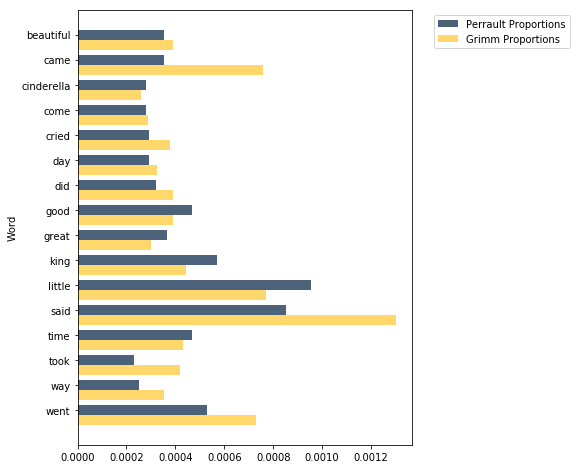

In [21]:
p_word_35 = make_array()
p_num_35 = make_array()
g_word_35 = make_array()
g_num_35 = make_array()

for i in range(len(p_common_35)-1):
    p_word_35 = np.append(p_word_35, p_common_35[i][0])
    p_num_35 = np.append(p_num_35, p_common_35[i][1])
    
for h in range(len(g_common_35)-1):
    g_word_35 = np.append(g_word_35, g_common_35[h][0])
    g_num_35 = np.append(g_num_35, g_common_35[h][1])
    
p_prop = p_num_35 / len_raw_p
g_prop = g_num_35 /len_raw_g
    
p_table = Table().with_columns("Perrault", p_word_35, "Perrault Proportions", p_prop)
g_table = Table().with_columns("Grimm", g_word_35, "Grimm Proportions", g_prop)
common_table = p_table.join("Perrault", g_table, "Grimm")
common_table = common_table.relabeled(0,"Word")
common_table.barh("Word")

In [22]:
cv= CountVectorizer()
dtm_perrault = cv.fit_transform(perrault)
dtm_perrault

<8x2502 sparse matrix of type '<class 'numpy.int64'>'
	with 4968 stored elements in Compressed Sparse Row format>

In [23]:
p_desparse = dtm_perrault.toarray()

p_word_list = cv.get_feature_names()

p_dtm_tb = Table(p_word_list).with_rows(p_desparse).drop(stop_words)
p_dtm_tb

abandon | abandoned | able | absence | abundance | accepted | accident | accordance | according | account | accustomed | acquaintance | acquaintances | acquainted | acquired | acquiring | added | adding | addressed | adjust | admirable | admiration | admire | admired | admit | ado  | advantage | adventure | advice | advised | affair | affairs | affection | affirm | afflicted | affliction | afford | affrighting | afraid | age  | aged | ago  | agree | agreed | ah   | ahead | air  | alarm | alas | alight | alighted | alike | alive | alleys | altogether | amazed | amazement | amends | ample | amusing | angel | anger | animal | animals | anne | announced | announcement | answer | answered | anxiety | anybody | apartment | apartments | apparel | appeal | appealing | appear | appearance | appeared | appetite | apply | appointed | approach | approaching | approved | arms | army | arose | arrest | arrived | arriving | arrogant | arrogantly | art  | ascertain | ashes | ask  | asked | asks | asleep | assistance | assured | astonished | astounded | ate  | attack | attempt | attend | attendants | attended | attentively | attorney | attractions | attractive | avenue | aversion | avert | aviary | awaiting | awaken | awakened | awakening | away | awoke | awry | babies | backs | backwards | bad  | bade | badly | bag  | ball | balls | band | banquet | banter | baring | baronesses | basement | bathe | bathed | bathing | batter | battle | bawl | bawled | bear | beard | beast | beat | beauties | beautiful | beauty | bed  | bedaubed | bedclothes | beds | beg  | began | begged | begging | beguiled | begun | behave | beheld | behold | believe | believed | believing | belong | belonged | belonging | belongs | beneath | bent | beset | best | bestow | bestowed | bethought | better | bewildered | bewitched | big  | bigger | birds | birth | bit  | bits | bitten | bitter | bitterly | black | blame | blonde | blood | bloody | blue | boasted | bobbin | bodies | body | bolted | boots | bore | born | bother | bought | bouquets | bow  | bows | boy  | boys | brace | brambles | bran | branch | brave | bread | breakfast | breath | breathing | breathless | bred | bride | brief | bright | brightly | bring | bringing | brings | briskly | broke | brother | brothers | brought | brushes | build | buildings | bundles | burner | burst | bushes | busied | busily | business | busy | butcher | butter | butterflies | buy  | byway | cabinets | cake | cakes | calf | called | came | candle | cantalabutte | capital | caps | captains | captured | carabas | care | carefully | carnivals | carried | carrion | carry | carrying | case | cases | casket | caskets | cast | castle | cat  | catch | caught | cause | caused | causing | ceased | ceases | cellar | century | ceremonies | ceremony | certain | certainly | chafed | chamber | chance | chanced | change | changed | chapel | chaplain | charcoal | chariot | charlatan | charlatans | charlotte | charm | charmed | charming | charms | chatter | cheat | cheeks | cheer | cheese | chest | chief | child | children | chimney | choice | chopped | chose | christening | cinderella | cinders | cinderwench | citrons | city | civil | civilities | civilly | claim | clean | cleaned | cleanest | clerk | climbed | cloak | clock | close | closed | closely | closet | closets | cloth | clothes | clotted | cloud | clumsy | clung | coach | coaches | coachman | coarse | coaxing | coins | cold | collar | color | colored | colors | come | comes | comfort | comfortable | comfortless | coming | command | commanded | commend | commissions | commotion | companion | company | comparison | compassion | complacent | completed | completely | complexion | complexions | compliments | conceal | concern | concerned | concluded | conclusion | condemning | condition | conditions | conferred | confide | confident | confronted | confused | congratulated | conscience | consent | consented | consequence | consider | considered | considering | consolation | consort | consulted | co

In [24]:
p_toks_tab = Table()
p_toks_tab.append_column(label="Word List", values=p_word_list)
p_toks_tab.append_column(label="Frequency", values=sum(p_desparse))  
p_row_sums = np.sum(p_desparse, axis=1)
p_normed = p_desparse/p_row_sums[:,None]
p_dtm_tb = Table(p_word_list).with_rows(p_normed)
p_dtm_tb

abandon     | abandoned   | able        | about      | above       | absence     | abundance  | accepted    | accident    | accordance  | according   | account     | accustomed  | acquaintance | acquaintances | acquainted | acquired   | acquiring   | added       | adding      | addressed   | adjust      | admirable  | admiration  | admire      | admired    | admit      | ado         | advantage   | adventure   | advice      | advised    | affair      | affairs     | affection   | affirm      | afflicted   | affliction  | afford      | affrighting | afraid      | after       | afterwards  | again       | against     | age         | aged        | ago         | agree       | agreed     | ah          | ahead      | air         | alarm       | alas        | alight     | alighted    | alike       | alive       | all        | alleys      | almost      | alone       | along       | already     | also        | although    | altogether  | always      | am          | amazed      | amazement   | amends      | among      | amount      | ample       | amusing     | an          | and       | angel       | anger       | animal      | animals     | anne       | announced   | announcement | another     | answer      | answered    | anxiety     | any         | anybody     | anyone      | anything    | apartment   | apartments  | apparel     | appeal      | appealing  | appear      | appearance  | appeared    | appetite    | apply       | appointed   | approach    | approaching | approved    | are         | arms        | army        | arose       | arrest     | arrived     | arriving    | arrogant   | arrogantly | art         | as         | ascertain   | ashes       | ask        | asked       | asks       | asleep      | assistance | assured    | astonished  | astounded  | at         | ate         | attack     | attempt     | attend      | attendants  | attended    | attentively | attorney   | attractions | attractive | avenue      | aversion    | avert       | aviary     | awaiting    | awaken      | awakened    | awakening   | away       | awoke       | awry        | babies      | back        | backs       | backwards  | bad         | bade        | badly      | bag        | ball       | balls      | band       | banquet     | banter      | baring      | baronesses | basement    | bathe      | bathed      | bathing    | batter     | battle      | bawl        | bawled      | be         | bear        | beard       | beast       | beat        | beauties    | beautiful   | beauty      | became      | because    | become      | bed         | bedaubed    | bedclothes | beds        | been        | before      | beg         | began       | begged      | begging     | beguiled    | begun      | behave      | beheld      | behind     | behold      | being       | believe     | believed    | believing  | belong     | belonged   | belonging  | belongs     | below       | beneath    | bent        | beset       | beside      | best       | bestow      | bestowed    | bethought   | better      | between     | bewildered  | bewitched   | beyond     | big         | bigger      | birds       | birth       | bit         | bits        | bitten      | bitter     | bitterly    | black       | blame       | blonde     | blood       | bloody      | blue       | boasted    | bobbin     | bodies      | body        | bolted      | boots       | bore        | born        | both        | bother      | bought      | bouquets   | bow        | bows       | boy         | boys        | brace      | brambles    | bran       | branch      | brave       | bread       | breakfast   | breath      | breathing   | breathless | bred       | bride      | brief       | bright     | brightly   | bring       | bringing   | brings      | briskly    | broke       | brother     | brothers   | brought     | brushes     | build      | buildings  | bundles     | burner      | burst       | bushes      | busied     | busily      | business    | busy        | but        | butcher     | butter     |

In [25]:
cv = CountVectorizer(stop_words = stop_words)
p_dtm = cv.fit_transform(perrault)
pt = TfidfTransformer(norm='l1',use_idf=False)
p_dtm_tf = pt.fit_transform(p_dtm)

p_word_list = cv.get_feature_names()
p_dtm_array = p_dtm_tf.toarray()
Table(p_word_list).with_rows(p_dtm_array)

abandon    | abandoned   | able       | absence     | abundance  | accepted   | accident    | accordance  | according   | account    | accustomed  | acquaintance | acquaintances | acquainted | acquired   | acquiring   | added       | adding     | addressed   | adjust     | admirable  | admiration  | admire     | admired    | admit      | ado         | advantage  | adventure   | advice      | advised    | affair      | affairs    | affection   | affirm      | afflicted  | affliction | afford     | affrighting | afraid      | age        | aged       | ago         | agree       | agreed     | ah         | ahead      | air        | alarm       | alas       | alight     | alighted   | alike       | alive      | alleys      | altogether | amazed      | amazement   | amends     | ample       | amusing    | angel      | anger      | animal      | animals     | anne      | announced   | announcement | answer      | answered    | anxiety     | anybody    | apartment  | apartments  | apparel    | appeal     | appealing  | appear     | appearance  | appeared   | appetite    | apply      | appointed   | approach    | approaching | approved    | arms        | army       | arose       | arrest     | arrived    | arriving   | arrogant   | arrogantly | art         | ascertain  | ashes      | ask        | asked      | asks       | asleep     | assistance | assured    | astonished | astounded  | ate         | attack     | attempt     | attend     | attendants  | attended    | attentively | attorney   | attractions | attractive | avenue     | aversion   | avert       | aviary     | awaiting    | awaken     | awakened    | awakening   | away       | awoke       | awry       | babies      | backs       | backwards  | bad         | bade        | badly      | bag        | ball      | balls      | band       | banquet     | banter     | baring      | baronesses | basement    | bathe      | bathed     | bathing    | batter     | battle      | bawl       | bawled     | bear       | beard      | beast       | beat        | beauties   | beautiful  | beauty     | bed        | bedaubed   | bedclothes | beds       | beg         | began      | begged     | begging     | beguiled    | begun      | behave     | beheld     | behold      | believe     | believed    | believing  | belong     | belonged   | belonging  | belongs     | beneath    | bent        | beset      | best       | bestow     | bestowed   | bethought   | better     | bewildered  | bewitched   | big         | bigger      | birds       | birth       | bit        | bits        | bitten      | bitter     | bitterly    | black       | blame       | blonde     | blood      | bloody      | blue      | boasted    | bobbin   | bodies     | body       | bolted      | boots      | bore        | born        | bother      | bought     | bouquets   | bow        | bows       | boy        | boys        | brace      | brambles   | bran       | branch      | brave      | bread       | breakfast   | breath     | breathing   | breathless | bred       | bride      | brief       | bright     | brightly   | bring      | bringing   | brings     | briskly    | broke      | brother     | brothers   | brought    | brushes    | build      | buildings  | bundles    | burner      | burst       | bushes      | busied     | busily      | business    | busy       | butcher     | butter     | butterflies | buy        | byway       | cabinets   | cake      | cakes      | calf       | called      | came       | candle     | cantalabutte | capital     | caps       | captains   | captured    | carabas   | care        | carefully  | carnivals  | carried    | carrion     | carry       | carrying    | case        | cases       | casket     | caskets    | cast       | castle     | cat       | catch       | caught     | cause      | caused     | causing    | ceased     | ceases     | cellar      | century     | ceremonies | ceremony    | certain    | certainly   | chafed      | chamber    | chance      | chanced     | change      | chan

In [26]:
p_married = p_dtm_tb.column("married")
p_dtm_tb.column("moral")

array([ 0.00027601,  0.00149701,  0.00106383,  0.00234192,  0.00233918,
        0.00042159,  0.00056117,  0.00041876])

In [27]:
dtm_grimm = cv.fit_transform(grimm)
dtm_grimm

<8x1617 sparse matrix of type '<class 'numpy.int64'>'
	with 2823 stored elements in Compressed Sparse Row format>

In [28]:
g_desparse = dtm_grimm.toarray()

g_word_list = cv.get_feature_names()

g_dtm_tb = Table(g_word_list).with_rows(g_desparse).drop(stop_words)
g_dtm_tb

abandoned | able | absolute | absolutely | accompanied | accomplish | accordance | account | achieve | admiration | admire | adversary | affliction | afraid | afresh | afterward | age  | aged | agreeable | agreed | ah   | ahead | aim  | air  | alarmed | alas | alighted | alike | alive | allow | allowed | altar | anew | angrily | angry | anguish | animal | animals | answer | answered | answering | anxious | apparently | appear | appeared | apple | apples | appointed | apprentice | apprentices | approached | apron | arm  | armful | arose | aroused | arrived | arts | ashamed | ashes | aside | asked | asking | asks | asleep | astonished | astonishment | ate  | attempted | attendants | awaits | awake | awaken | aware | away | awoke | axe  | backwards | bacon | bad  | bade | baked | baker | ball | banquet | bargain | barking | barn | barns | bars | bass | bear | beasts | beating | beautiful | beautifully | beauty | bed  | bedgown | bedside | befall | beg  | began | begged | begin | beginning | begrudged | behave | behaved | beheld | behold | beings | believe | believed | belly | belonged | beneath | best | betook | betrothed | better | bidden | big  | bird | birds | birth | bit  | bite | bits | black | blackened | bled | blew | blind | blindness | blood | bloody | blow | blown | blue | bluish | body | boiled | boldly | bolt | bolted | boots | bosom | bottle | bottles | bought | bounded | bouquet | bowed | bowl | boy  | boys | branch | branches | bread | break | breast | breathe | breathing | bride | bridegroom | bright | brightness | bring | bringing | brings | broad | broke | broken | brother | brought | brush | brushed | bucket | buckles | build | buildings | built | bull | burn | burning | burst | bush | bushes | buy  | byre | cage | cake | cakes | called | calling | came | candle | cap  | capture | care | career | carefully | carpenter | carried | carry | carrying | cart | carved | cask | castle | cat  | catch | catching | cats | caught | caused | cave | cavern | ceiling | celebrated | cellar | certain | certainly | chamber | change | changed | chase | cheeks | chest | chests | child | children | choose | chop | chopped | chosen | church | cinderella | cinders | civil | clambered | clean | clear | clever | climbed | cloak | close | closed | closely | clothed | clothes | coach | coat | cock | coffin | collect | colored | comb | come | comes | comforted | comforting | coming | command | company | compassion | completely | complexion | comply | conceive | confess | confidence | confined | consciousness | consented | consequence | consider | consideration | constantly | content | continued | contribute | conversation | cook | cooked | copper | cord | corner | corners | councilors | count | country | couple | courage | courtesy | cover | covered | cow  | cows | creature | creep | crept | crew | cried | cries | crop | crowd | crowding | crying | cubbyhole | curiosity | curtains | curtsied | cut  | cuts | dainty | dance | danced | dancing | dangerous | dark | darkest | darkness | darling | daughter | daughters | dawned | day  | daybreak | daylight | days | dead | deal | dear | death | deceased | decision | decked | declared | deeds | deep | degree | delay | delicate | delicately | delighted | delightful | deliver | deliverance | delivered | deliverer | den  | departed | deprived | depths | described | desert | deserted | desire | desired | desires | destined | determined | dexterous | did  | didn | die  | died | difference | different | difficulty | diligently | dim  | diminished | dined | dinner | dipped | dirt | dirty | disappeared | discharged | discovered | dish | dishes | dislike | dismal | dismembered | dismissed | disquietude | dissuade | distance | distinctly | divert | divine | does | dogs | doing | don  | doo  | doodle | door | doors | doubt | doves | downstairs | dragged | dragging | drank | draught | draw | drawing | drawn | dream | dreaming | dreamt | dress | dressed | dresses | drew | dried | drink | driven | driver | dro

In [29]:
g_toks_tab = Table()
g_toks_tab.append_column(label="Word List", values=g_word_list)
g_toks_tab.append_column(label="Frequency", values=sum(g_desparse))  
g_row_sums = np.sum(g_desparse, axis=1)
g_normed = g_desparse/g_row_sums[:,None]
g_dtm_tb = Table(g_word_list).with_rows(g_normed)
g_dtm_tb

abandoned  | able       | absolute   | absolutely  | accompanied | accomplish | accordance | account     | achieve    | admiration | admire    | adversary | affliction | afraid     | afresh      | afterward  | age        | aged       | agreeable | agreed     | ah         | ahead      | aim        | air        | alarmed    | alas       | alighted   | alike     | alive      | allow       | allowed     | altar     | anew       | angrily   | angry      | anguish    | animal     | animals    | answer     | answered    | answering | anxious     | apparently | appear      | appeared    | apple      | apples    | appointed  | apprentice | apprentices | approached  | apron      | arm        | armful     | arose      | aroused    | arrived    | arts      | ashamed     | ashes      | aside      | asked       | asking      | asks       | asleep     | astonished  | astonishment | ate        | attempted  | attendants | awaits    | awake      | awaken    | aware      | away       | awoke      | axe        | backwards  | bacon      | bad        | bade       | baked      | baker      | ball       | banquet    | bargain    | barking    | barn       | barns     | bars       | bass       | bear        | beasts    | beating    | beautiful  | beautifully | beauty      | bed         | bedgown     | bedside     | befall    | beg       | began      | begged      | begin     | beginning  | begrudged  | behave     | behaved    | beheld    | behold     | beings    | believe     | believed   | belly      | belonged    | beneath    | best       | betook     | betrothed   | better     | bidden     | big         | bird       | birds      | birth      | bit        | bite       | bits      | black       | blackened  | bled       | blew       | blind      | blindness   | blood      | bloody     | blow       | blown      | blue      | bluish    | body       | boiled     | boldly    | bolt      | bolted    | boots      | bosom      | bottle     | bottles   | bought      | bounded   | bouquet    | bowed       | bowl       | boy        | boys       | branch     | branches    | bread       | break       | breast    | breathe    | breathing | bride      | bridegroom | bright     | brightness | bring      | bringing   | brings     | broad      | broke       | broken     | brother    | brought    | brush       | brushed     | bucket     | buckles     | build      | buildings | built      | bull      | burn       | burning     | burst      | bush        | bushes     | buy        | byre       | cage       | cake       | cakes      | called     | calling    | came       | candle     | cap       | capture    | care       | career    | carefully  | carpenter  | carried    | carry       | carrying   | cart       | carved    | cask       | castle     | cat       | catch      | catching   | cats       | caught    | caused      | cave       | cavern     | ceiling   | celebrated  | cellar     | certain    | certainly   | chamber     | change     | changed   | chase     | cheeks     | chest     | chests    | child      | children   | choose      | chop       | chopped    | chosen    | church      | cinderella | cinders     | civil     | clambered   | clean       | clear      | clever     | climbed     | cloak     | close     | closed      | closely   | clothed    | clothes    | coach      | coat       | cock       | coffin    | collect   | colored   | comb        | come       | comes      | comforted  | comforting | coming     | command    | company     | compassion | completely | complexion | comply    | conceive  | confess    | confidence | confined  | consciousness | consented | consequence | consider   | consideration | constantly | content    | continued  | contribute | conversation | cook        | cooked     | copper     | cord      | corner     | corners    | councilors | count     | country     | couple      | courage    | courtesy  | cover      | covered     | cow        | cows       | creature   | creep      | crept      | crew       | cried      | cries     | crop     

In [30]:
cv = CountVectorizer(stop_words = stop_words)
g_dtm = cv.fit_transform(grimm)
gt = TfidfTransformer(norm='l1',use_idf=False)
g_dtm_tf = gt.fit_transform(g_dtm)

g_word_list = cv.get_feature_names()
g_dtm_array = g_dtm_tf.toarray()
Table(g_word_list).with_rows(g_dtm_array)

abandoned  | able       | absolute   | absolutely  | accompanied | accomplish | accordance | account     | achieve    | admiration | admire    | adversary | affliction | afraid     | afresh      | afterward  | age        | aged       | agreeable | agreed     | ah         | ahead      | aim        | air        | alarmed    | alas       | alighted   | alike     | alive      | allow       | allowed     | altar     | anew       | angrily   | angry      | anguish    | animal     | animals    | answer     | answered    | answering | anxious     | apparently | appear      | appeared    | apple      | apples    | appointed  | apprentice | apprentices | approached  | apron      | arm        | armful     | arose      | aroused    | arrived    | arts      | ashamed     | ashes      | aside      | asked       | asking      | asks       | asleep     | astonished  | astonishment | ate        | attempted  | attendants | awaits    | awake      | awaken    | aware      | away       | awoke      | axe        | backwards  | bacon      | bad        | bade       | baked      | baker      | ball       | banquet    | bargain    | barking    | barn       | barns     | bars       | bass       | bear        | beasts    | beating    | beautiful  | beautifully | beauty      | bed         | bedgown     | bedside     | befall    | beg       | began      | begged      | begin     | beginning  | begrudged  | behave     | behaved    | beheld    | behold     | beings    | believe     | believed   | belly      | belonged    | beneath    | best       | betook     | betrothed   | better     | bidden     | big         | bird       | birds      | birth      | bit        | bite       | bits      | black       | blackened  | bled       | blew       | blind      | blindness   | blood      | bloody     | blow       | blown      | blue      | bluish    | body       | boiled     | boldly    | bolt      | bolted    | boots      | bosom      | bottle     | bottles   | bought      | bounded   | bouquet    | bowed       | bowl       | boy        | boys       | branch     | branches    | bread       | break       | breast    | breathe    | breathing | bride      | bridegroom | bright     | brightness | bring      | bringing   | brings     | broad      | broke       | broken     | brother    | brought    | brush       | brushed     | bucket     | buckles     | build      | buildings | built      | bull      | burn       | burning     | burst      | bush        | bushes     | buy        | byre       | cage       | cake       | cakes      | called     | calling    | came       | candle     | cap       | capture    | care       | career    | carefully  | carpenter  | carried    | carry       | carrying   | cart       | carved    | cask       | castle     | cat       | catch      | catching   | cats       | caught    | caused      | cave       | cavern     | ceiling   | celebrated  | cellar     | certain    | certainly   | chamber     | change     | changed   | chase     | cheeks     | chest     | chests    | child      | children   | choose      | chop       | chopped    | chosen    | church      | cinderella | cinders     | civil     | clambered   | clean       | clear      | clever     | climbed     | cloak     | close     | closed      | closely   | clothed    | clothes    | coach      | coat       | cock       | coffin    | collect   | colored   | comb        | come       | comes      | comforted  | comforting | coming     | command    | company     | compassion | completely | complexion | comply    | conceive  | confess    | confidence | confined  | consciousness | consented | consequence | consider   | consideration | constantly | content    | continued  | contribute | conversation | cook        | cooked     | copper     | cord      | corner     | corners    | councilors | count     | country     | couple      | courage    | courtesy  | cover      | covered     | cow        | cows       | creature   | creep      | crept      | crew       | cried      | cries     | crop     

Marriage is a common happy ending to many fairy tales, so I just wanted to see how the two corpora compared in regards to that. 

In [31]:
g_married = g_dtm_tb.column("married")

In [32]:
p_married , g_married

(array([ 0.00055203,  0.        ,  0.00159574,  0.00058548,  0.00116959,
         0.00042159,  0.        ,  0.        ]),
 array([ 0.        ,  0.        ,  0.        ,  0.00377358,  0.        ,
         0.00208768,  0.        ,  0.        ]))

The variable "tales" combines both sets of stories to create one set of data. 

In [33]:
tales = list(perrault + grimm)
tales

['The Sleeping Beauty in the Wood,"\nOnce upon a time there lived a king and queen who were grieved, more \ngrieved than words can tell, because they had no \nchildren. They tried the waters of every country, made vows and \npilgrimages, and did everything that could be done, but without \nresult. At last, however, the queen found that her wishes were fulfilled, \nand in due course she gave birth to a daughter. \n\nA grand christening was held, and all the fairies that could be found \nin the realm (they numbered seven in all) were invited to \nbe godmothers to the little princess. This was done so that by means of \nthe gifts which each in turn would bestow upon her (in \naccordance with the fairy custom of those days) the princess might be \nendowed with every imaginable perfection. \n\nWhen the christening ceremony was over, all the company returned to the \nking\'s palace, where a great banquet was held in \nhonor of the fairies. Places were laid for them in magnificent style, and 

In [34]:
tales1 = perrault1+grimm1 
tales_tokens = tales1.split()
tales_tokens

['the',
 'sleeping',
 'beauty',
 'in',
 'the',
 'wood',
 'once',
 'upon',
 'a',
 'time',
 'there',
 'lived',
 'a',
 'king',
 'and',
 'queen',
 'who',
 'were',
 'grieved',
 'more',
 'grieved',
 'than',
 'words',
 'can',
 'tell',
 'because',
 'they',
 'had',
 'no',
 'children',
 'they',
 'tried',
 'the',
 'waters',
 'of',
 'every',
 'country',
 'made',
 'vows',
 'and',
 'pilgrimages',
 'and',
 'did',
 'everything',
 'that',
 'could',
 'be',
 'done',
 'but',
 'without',
 'result',
 'at',
 'last',
 'however',
 'the',
 'queen',
 'found',
 'that',
 'her',
 'wishes',
 'were',
 'fulfilled',
 'and',
 'in',
 'due',
 'course',
 'she',
 'gave',
 'birth',
 'to',
 'a',
 'daughter',
 'a',
 'grand',
 'christening',
 'was',
 'held',
 'and',
 'all',
 'the',
 'fairies',
 'that',
 'could',
 'be',
 'found',
 'in',
 'the',
 'realm',
 'they',
 'numbered',
 'seven',
 'in',
 'all',
 'were',
 'invited',
 'to',
 'be',
 'godmothers',
 'to',
 'the',
 'little',
 'princess',
 'this',
 'was',
 'done',
 'so',
 'that',

In [35]:
tales_tokens = [x for x in tales_tokens if x not in stop_words]
tales_tokens

['sleeping',
 'beauty',
 'wood',
 'time',
 'lived',
 'king',
 'queen',
 'grieved',
 'grieved',
 'words',
 'tell',
 'children',
 'tried',
 'waters',
 'country',
 'vows',
 'pilgrimages',
 'did',
 'result',
 'queen',
 'wishes',
 'fulfilled',
 'course',
 'gave',
 'birth',
 'daughter',
 'grand',
 'christening',
 'held',
 'fairies',
 'realm',
 'numbered',
 'seven',
 'invited',
 'godmothers',
 'little',
 'princess',
 'means',
 'gifts',
 'turn',
 'bestow',
 'accordance',
 'fairy',
 'custom',
 'days',
 'princess',
 'endowed',
 'imaginable',
 'perfection',
 'christening',
 'ceremony',
 'company',
 'returned',
 'kings',
 'palace',
 'great',
 'banquet',
 'held',
 'honor',
 'fairies',
 'places',
 'laid',
 'magnificent',
 'style',
 'placed',
 'solid',
 'gold',
 'casket',
 'containing',
 'spoon',
 'fork',
 'knife',
 'fine',
 'gold',
 'set',
 'diamonds',
 'rubies',
 'just',
 'sitting',
 'table',
 'aged',
 'fairy',
 'seen',
 'enter',
 'thought',
 'invite',
 'reason',
 'years',
 'quitted',
 'tower',
 'l

In [36]:
dict = Counter(tales_tokens)
dict.most_common()

[('said', 182),
 ('little', 151),
 ('went', 107),
 ('came', 92),
 ('king', 89),
 ('time', 78),
 ('good', 75),
 ('beautiful', 64),
 ('did', 61),
 ('great', 58),
 ('cried', 57),
 ('took', 54),
 ('wife', 54),
 ('day', 53),
 ('princess', 51),
 ('way', 51),
 ('poor', 51),
 ('children', 50),
 ('come', 49),
 ('mother', 48),
 ('house', 47),
 ('cinderella', 47),
 ('away', 46),
 ('bed', 44),
 ('home', 44),
 ('red', 43),
 ('saw', 43),
 ('old', 42),
 ('father', 42),
 ('kings', 40),
 ('just', 38),
 ('young', 38),
 ('long', 38),
 ('gave', 37),
 ('girl', 37),
 ('queen', 36),
 ('woman', 36),
 ('fell', 35),
 ('ogre', 35),
 ('gold', 34),
 ('ran', 34),
 ('like', 33),
 ('son', 33),
 ('grandmother', 33),
 ('wolf', 33),
 ('began', 32),
 ('shall', 32),
 ('asked', 32),
 ('cat', 32),
 ('thought', 31),
 ('told', 31),
 ('make', 31),
 ('heard', 30),
 ('large', 30),
 ('know', 30),
 ('door', 30),
 ('daughter', 29),
 ('eyes', 29),
 ('castle', 28),
 ('got', 28),
 ('cap', 28),
 ('soon', 27),
 ('brought', 27),
 ('princ

In [37]:
dtm = cv.fit_transform(tales)
dtm

<16x3036 sparse matrix of type '<class 'numpy.int64'>'
	with 6609 stored elements in Compressed Sparse Row format>

In [38]:
desparse = dtm.toarray()

word_list = cv.get_feature_names()

dtm_tb = Table(word_list).with_rows(desparse).drop(stop_words)
dtm_tb

abandon | abandoned | able | absence | absolute | absolutely | abundance | accepted | accident | accompanied | accomplish | accordance | according | account | accustomed | achieve | acquaintance | acquaintances | acquainted | acquired | acquiring | added | adding | addressed | adjust | admirable | admiration | admire | admired | admit | ado  | advantage | adventure | adversary | advice | advised | affair | affairs | affection | affirm | afflicted | affliction | afford | affrighting | afraid | afresh | afterward | age  | aged | ago  | agree | agreeable | agreed | ah   | ahead | aim  | air  | alarm | alarmed | alas | alight | alighted | alike | alive | alleys | allow | allowed | altar | altogether | amazed | amazement | amends | ample | amusing | anew | angel | anger | angrily | angry | anguish | animal | animals | anne | announced | announcement | answer | answered | answering | anxiety | anxious | anybody | apartment | apartments | apparel | apparently | appeal | appealing | appear | appearance | appeared | appetite | apple | apples | apply | appointed | apprentice | apprentices | approach | approached | approaching | approved | apron | arm  | armful | arms | army | arose | aroused | arrest | arrived | arriving | arrogant | arrogantly | art  | arts | ascertain | ashamed | ashes | aside | ask  | asked | asking | asks | asleep | assistance | assured | astonished | astonishment | astounded | ate  | attack | attempt | attempted | attend | attendants | attended | attentively | attorney | attractions | attractive | avenue | aversion | avert | aviary | awaiting | awaits | awake | awaken | awakened | awakening | aware | away | awoke | awry | axe  | babies | backs | backwards | bacon | bad  | bade | badly | bag  | baked | baker | ball | balls | band | banquet | banter | bargain | baring | barking | barn | barns | baronesses | bars | basement | bass | bathe | bathed | bathing | batter | battle | bawl | bawled | bear | beard | beast | beasts | beat | beating | beauties | beautiful | beautifully | beauty | bed  | bedaubed | bedclothes | bedgown | beds | bedside | befall | beg  | began | begged | begging | begin | beginning | begrudged | beguiled | begun | behave | behaved | beheld | behold | beings | believe | believed | believing | belly | belong | belonged | belonging | belongs | beneath | bent | beset | best | bestow | bestowed | bethought | betook | betrothed | better | bewildered | bewitched | bidden | big  | bigger | bird | birds | birth | bit  | bite | bits | bitten | bitter | bitterly | black | blackened | blame | bled | blew | blind | blindness | blonde | blood | bloody | blow | blown | blue | bluish | boasted | bobbin | bodies | body | boiled | boldly | bolt | bolted | boots | bore | born | bosom | bother | bottle | bottles | bought | bounded | bouquet | bouquets | bow  | bowed | bowl | bows | boy  | boys | brace | brambles | bran | branch | branches | brave | bread | break | breakfast | breast | breath | breathe | breathing | breathless | bred | bride | bridegroom | brief | bright | brightly | brightness | bring | bringing | brings | briskly | broad | broke | broken | brother | brothers | brought | brush | brushed | brushes | bucket | buckles | build | buildings | built | bull | bundles | burn | burner | burning | burst | bush | bushes | busied | busily | business | busy | butcher | butter | butterflies | buy  | byre | byway | cabinets | cage | cake | cakes | calf | called | calling | came | candle | cantalabutte | cap  | capital | caps | captains | capture | captured | carabas | care | career | carefully | carnivals | carpenter | carried | carrion | carry | carrying | cart | carved | case | cases | cask | casket | caskets | cast | castle | cat  | catch | catching | cats | caught | cause | caused | causing | cave | cavern | ceased | ceases | ceiling | celebrated | cellar | century | ceremonies | ceremony | certain | certainly | chafed | chamber | chance | chanced | change | changed | chapel | chaplain | charcoal | chariot | cha

In [39]:
toks_tab = Table()
toks_tab.append_column(label="Word List", values=word_list)
toks_tab.append_column(label="Frequency", values=sum(desparse))  
row_sums = np.sum(desparse, axis=1)
normed = desparse/row_sums[:,None]
dtm_tb = Table(word_list).with_rows(normed)
dtm_tb

abandon    | abandoned   | able       | absence     | absolute | absolutely | abundance  | accepted   | accident    | accompanied | accomplish | accordance  | according   | account    | accustomed  | achieve    | acquaintance | acquaintances | acquainted | acquired   | acquiring   | added       | adding     | addressed   | adjust     | admirable  | admiration  | admire     | admired    | admit      | ado         | advantage  | adventure   | adversary | advice      | advised    | affair      | affairs    | affection   | affirm      | afflicted  | affliction | afford     | affrighting | afraid      | afresh | afterward  | age        | aged       | ago         | agree       | agreeable | agreed     | ah         | ahead      | aim        | air        | alarm       | alarmed | alas       | alight     | alighted   | alike       | alive      | alleys      | allow | allowed    | altar | altogether | amazed      | amazement   | amends     | ample       | amusing    | anew | angel      | anger      | angrily | angry | anguish | animal      | animals     | anne      | announced   | announcement | answer      | answered    | answering | anxiety     | anxious | anybody    | apartment  | apartments  | apparel    | apparently | appeal     | appealing  | appear     | appearance  | appeared   | appetite    | apple | apples | apply      | appointed   | apprentice | apprentices | approach    | approached | approaching | approved    | apron      | arm  | armful | arms        | army       | arose       | aroused | arrest     | arrived    | arriving   | arrogant   | arrogantly | art         | arts | ascertain  | ashamed | ashes      | aside | ask        | asked      | asking | asks       | asleep     | assistance | assured    | astonished | astonishment | astounded  | ate         | attack     | attempt     | attempted  | attend     | attendants  | attended    | attentively | attorney   | attractions | attractive | avenue     | aversion   | avert       | aviary     | awaiting    | awaits | awake | awaken     | awakened    | awakening   | aware | away       | awoke       | awry       | axe  | babies      | backs       | backwards  | bacon | bad         | bade        | badly      | bag        | baked      | baker | ball       | balls      | band       | banquet     | banter     | bargain | baring      | barking    | barn | barns | baronesses | bars | basement    | bass | bathe      | bathed     | bathing    | batter     | battle      | bawl       | bawled     | bear       | beard      | beast       | beasts | beat        | beating    | beauties   | beautiful  | beautifully | beauty     | bed        | bedaubed   | bedclothes | bedgown | beds       | bedside | befall | beg         | began      | begged     | begging     | begin | beginning  | begrudged | beguiled    | begun      | behave     | behaved | beheld     | behold      | beings | believe     | believed    | believing  | belly      | belong     | belonged   | belonging  | belongs     | beneath    | bent        | beset      | best       | bestow     | bestowed   | bethought   | betook | betrothed | better     | bewildered  | bewitched   | bidden | big         | bigger      | bird | birds       | birth       | bit        | bite       | bits        | bitten      | bitter     | bitterly    | black       | blackened  | blame       | bled | blew | blind | blindness | blonde     | blood      | bloody      | blow | blown | blue      | bluish | boasted    | bobbin   | bodies     | body       | boiled     | boldly | bolt | bolted      | boots      | bore        | born        | bosom | bother      | bottle     | bottles | bought     | bounded | bouquet    | bouquets   | bow        | bowed | bowl       | bows       | boy        | boys        | brace      | brambles   | bran       | branch      | branches | brave      | bread       | break      | breakfast   | breast | breath     | breathe    | breathing   | breathless | bred       | bride      | bridegroom | brief       | bright     | brightly   | brightnes

In [40]:
cv = CountVectorizer(stop_words = stop_words)
dtm = cv.fit_transform(tales)
tt = TfidfTransformer(norm='l1',use_idf=False)
dtm_tf = tt.fit_transform(dtm)

word_list = cv.get_feature_names()
dtm_array = dtm_tf.toarray()
Table(word_list).with_rows(dtm_array)

abandon    | abandoned   | able       | absence     | absolute | absolutely | abundance  | accepted   | accident    | accompanied | accomplish | accordance  | according   | account    | accustomed  | achieve    | acquaintance | acquaintances | acquainted | acquired   | acquiring   | added       | adding     | addressed   | adjust     | admirable  | admiration  | admire     | admired    | admit      | ado         | advantage  | adventure   | adversary | advice      | advised    | affair      | affairs    | affection   | affirm      | afflicted  | affliction | afford     | affrighting | afraid      | afresh | afterward  | age        | aged       | ago         | agree       | agreeable | agreed     | ah         | ahead      | aim        | air        | alarm       | alarmed | alas       | alight     | alighted   | alike       | alive      | alleys      | allow | allowed    | altar | altogether | amazed      | amazement   | amends     | ample       | amusing    | anew | angel      | anger      | angrily | angry | anguish | animal      | animals     | anne      | announced   | announcement | answer      | answered    | answering | anxiety     | anxious | anybody    | apartment  | apartments  | apparel    | apparently | appeal     | appealing  | appear     | appearance  | appeared   | appetite    | apple | apples | apply      | appointed   | apprentice | apprentices | approach    | approached | approaching | approved    | apron      | arm  | armful | arms        | army       | arose       | aroused | arrest     | arrived    | arriving   | arrogant   | arrogantly | art         | arts | ascertain  | ashamed | ashes      | aside | ask        | asked      | asking | asks       | asleep     | assistance | assured    | astonished | astonishment | astounded  | ate         | attack     | attempt     | attempted  | attend     | attendants  | attended    | attentively | attorney   | attractions | attractive | avenue     | aversion   | avert       | aviary     | awaiting    | awaits | awake | awaken     | awakened    | awakening   | aware | away       | awoke       | awry       | axe  | babies      | backs       | backwards  | bacon | bad         | bade        | badly      | bag        | baked      | baker | ball       | balls      | band       | banquet     | banter     | bargain | baring      | barking    | barn | barns | baronesses | bars | basement    | bass | bathe      | bathed     | bathing    | batter     | battle      | bawl       | bawled     | bear       | beard      | beast       | beasts | beat        | beating    | beauties   | beautiful  | beautifully | beauty     | bed        | bedaubed   | bedclothes | bedgown | beds       | bedside | befall | beg         | began      | begged     | begging     | begin | beginning  | begrudged | beguiled    | begun      | behave     | behaved | beheld     | behold      | beings | believe     | believed    | believing  | belly      | belong     | belonged   | belonging  | belongs     | beneath    | bent        | beset      | best       | bestow     | bestowed   | bethought   | betook | betrothed | better     | bewildered  | bewitched   | bidden | big         | bigger      | bird | birds       | birth       | bit        | bite       | bits        | bitten      | bitter     | bitterly    | black       | blackened  | blame       | bled | blew | blind | blindness | blonde     | blood      | bloody      | blow | blown | blue      | bluish | boasted    | bobbin   | bodies     | body       | boiled     | boldly | bolt | bolted      | boots      | bore        | born        | bosom | bother      | bottle     | bottles | bought     | bounded | bouquet    | bouquets   | bow        | bowed | bowl       | bows       | boy        | boys        | brace      | brambles   | bran       | branch      | branches | brave      | bread       | break      | breakfast   | breast | breath     | breathe    | breathing   | breathless | bred       | bride      | bridegroom | brief       | bright     | brightly   | brightnes

K-means clustering of 2 was done to the combined set of stories. 

In [41]:
dist_matrix = pairwise.pairwise_distances(dtm_tf, metric='euclidean')
title_list = ['Story' +str(i+1) for i in range(len(tales))]
Table(title_list).with_rows(dist_matrix)

kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(dist_matrix)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [54]:
tales[1][:22], tales[9][:14]

('Little Red Riding Hood', 'Little Red Cap')

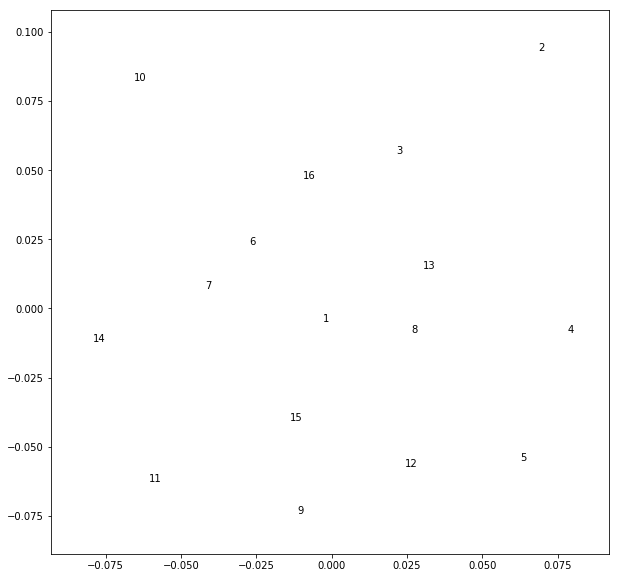

In [43]:
mds = MDS(n_components = 2, dissimilarity="precomputed")
embeddings = mds.fit_transform(dist_matrix)

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(16):
    ax.annotate(i+1, ((embeddings[i,0], embeddings[i,1])))

Sentiment analysis was done on the two separate corpora, and then their scores were compared. 

In [44]:
perrault_object = TextBlob(perrault_raw)
[s for s in perrault_object.sentences]
p_sentiment = 0
p_array = 0
for s in perrault_object.sentences:
    p_array = np.append(p_array, s.sentiment.polarity)
    p_sentiment = p_sentiment+ s.sentiment.polarity
    
p_sentiment / len(perrault_object.sentences)

0.10361619597628512

In [45]:
grimm_object = TextBlob(grimm_raw)
[h for h in grimm_object.sentences]
g_sentiment = 0
g_array = 0
for h in grimm_object.sentences:
    g_array = np.append(g_array, h.sentiment.polarity)
    g_sentiment = g_sentiment+ h.sentiment.polarity
    
g_sentiment / len(grimm_object.sentences)

0.08253588662753893

Now I will run a t-test to see if the difference between the two sentiment analysis scores are significant. 

Null Hypothesis: The two sentiment analysis scores are the same. Any difference is due to random variation.  

Alternative Hypothesis: The two sentiment analysis scores are different. 

In [46]:
p_mean = np.mean(p_array)
p_s_squared = sum((p_array - p_mean)**2) / (len(p_array)-1)

In [47]:
g_mean = np.mean(g_array)
g_s_squared = sum((g_array - g_mean)**2) / (len(g_array) -1)

In [48]:
t_stat = (p_mean - g_mean) / (np.sqrt((p_s_squared / len(p_array)) + g_s_squared / len(g_array)))
t_stat

1.4854535249594589

In [49]:
t_stat, p_val = stats.ttest_ind(p_array, g_array, equal_var=False)

In [50]:
t_stat

1.4854535249594587

In [51]:
p_val

0.13761701762724943

In [55]:
0.10361619597628512 -  0.0825358866275389

0.021080309348746218

The p-value of the t-test was 0.138, which for a 95% test confidence level test, is very high. Therefore, there the difference of the perrault sentiment score being 0.01853998902913133 (less than 2%) above the grimm sentiment score is not statistically significant. 